## **I. Identifikasi Masalah**

**Problem Statement :** Bagaimana perbedaan harga pesawat di berbagai wilayah penjualan, dan apakah ada wilayah tertentu yang memiliki harga rata-rata lebih tinggi atau lebih rendah?

**Analisis **SMART**:**

- Specific (Spesifik): Menganalisis perbedaan harga pesawat berdasarkan wilayah penjualan untuk mengetahui apakah ada pola harga tertentu di Asia, Eropa, Amerika Utara, atau wilayah lainnya.

- Measurable (Terukur): Mengukur rata-rata harga pesawat di setiap wilayah menggunakan data historis penjualan.

- Achievable (Dapat Dicapai): Melakukan pengolahan dan analisis data dari dataset yang berisi informasi wilayah penjualan dan harga pesawat untuk melihat pola harga di masing-masing wilayah.

- Relevant (Relevan): Analisis ini bermanfaat bagi maskapai penerbangan, perusahaan leasing, dan produsen pesawat untuk memahami bagaimana lokasi geografis mempengaruhi harga pesawat, serta membantu dalam strategi negosiasi dan pembelian pesawat.

- Time-bound (Terbatas Waktu): Hasil analisis akan dikemas dalam bentuk laporan atau dashboard interaktif dalam waktu yang telah ditentukan.

## **II. Data Loading**

URL SUMBER DATASET : https://www.kaggle.com/datasets/asinow/airplane-price-dataset

In [30]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('airplane_price_dataset.csv')
df

,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,"2,185.43",36,Asya,"12,857,083.91"
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,"1,202.08",26,Avrupa,"13,914,058.55"
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,"90,735,695.86"
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,"136,659,689.37"
4,Cessna 172,1985,1,Piston,4,1285,18.49,"4,245.99",38,Güney Amerika,"203,798.10"
...,...,...,...,...,...,...,...,...,...,...,...
12372,Boeing 777,1994,2,Turbofan,396,15600,12.16,"3,054.29",29,Avrupa,"389,807,070.36"
12373,Bombardier CRJ200,2005,2,Turbofan,50,3000,8.26,"3,107.67",18,Afrika,"15,938,876.07"
12374,Boeing 737,2015,2,Turbofan,162,5700,6.93,"3,972.16",8,Kuzey Amerika,"98,709,939.20"
12375,Cessna 172,2013,1,Piston,4,1285,14.28,999.84,10,Afrika,"396,520.67"


## **III. Data Cleaning**

In [31]:
print(df.columns)

Index(['Model', 'Üretim Yılı', 'Motor Sayısı', 'Motor Türü', 'Kapasite',
       'Menzil (km)', 'Yakıt Tüketimi (L/saat)', 'Saatlik Bakım Maliyeti ($)',
       'Yaş', 'Satış Bölgesi', 'Fiyat ($)'],
      dtype='object')


In [32]:
translation_columns = {
"Model": "Model",
"Üretim Yılı": "Year of Production",
"Motor Sayısı": "Number of Engines",
"Motor Türü": "Engine Type",
"Kapasite": "Capacity",
"Menzil (km)": "Range in km",
"Yakıt Tüketimi (L/saat)": "Fuel consumption in (L/hour)",
"Saatlik Bakım Maliyeti ($)": "Maintenance cost per hour",
"Yaş": "Age",
"Satış Bölgesi": "Sales Region",
"Fiyat ($)": "Price in USD"
}

df_airplane = df.rename(columns=translation_columns)

pd.options.display.float_format = "{:,.2f}".format

display(df_airplane)

,Model,Year of Production,Number of Engines,Engine Type,Capacity,Range in km,Fuel consumption in (L/hour),Maintenance cost per hour,Age,Sales Region,Price in USD
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,"2,185.43",36,Asya,"12,857,083.91"
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,"1,202.08",26,Avrupa,"13,914,058.55"
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,"90,735,695.86"
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,"136,659,689.37"
4,Cessna 172,1985,1,Piston,4,1285,18.49,"4,245.99",38,Güney Amerika,"203,798.10"
...,...,...,...,...,...,...,...,...,...,...,...
12372,Boeing 777,1994,2,Turbofan,396,15600,12.16,"3,054.29",29,Avrupa,"389,807,070.36"
12373,Bombardier CRJ200,2005,2,Turbofan,50,3000,8.26,"3,107.67",18,Afrika,"15,938,876.07"
12374,Boeing 737,2015,2,Turbofan,162,5700,6.93,"3,972.16",8,Kuzey Amerika,"98,709,939.20"
12375,Cessna 172,2013,1,Piston,4,1285,14.28,999.84,10,Afrika,"396,520.67"


In [33]:
df_airplane["Age"] = 2025 - df_airplane["Year of Production"]

print("\nStatistik Usia Pesawat:")
print(df_airplane["Age"].describe())


Statistik Usia Pesawat:
count   12,377.00
mean        23.52
std         12.77
min          2.00
25%         12.00
50%         24.00
75%         35.00
max         45.00
Name: Age, dtype: float64


In [34]:
batas_umur = 30
df_layak = df_airplane[df_airplane["Age"] <= batas_umur]

print("\nPesawat yang masih layak diteliti (Usia <= 30 tahun):")
print(df_layak[["Model", "Year of Production", "Age"]].head()) 


Pesawat yang masih layak diteliti (Usia <= 30 tahun):
                Model  Year of Production  Age
1   Bombardier CRJ200                1997   28
3          Boeing 737                2023    2
7          Cessna 172                2018    7
9   Bombardier CRJ200                2014   11
10        Airbus A320                2008   17


In [35]:
display(df_layak)


,Model,Year of Production,Number of Engines,Engine Type,Capacity,Range in km,Fuel consumption in (L/hour),Maintenance cost per hour,Age,Sales Region,Price in USD
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,"1,202.08",28,Avrupa,"13,914,058.55"
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,2,Avustralya,"136,659,689.37"
7,Cessna 172,2018,1,Piston,4,1285,24.65,"1,814.65",7,Asya,"396,750.44"
9,Bombardier CRJ200,2014,2,Turbofan,50,3000,2.60,"3,165.87",11,Afrika,"16,981,571.17"
10,Airbus A320,2008,2,Turbofan,180,6300,4.22,"3,233.95",17,Güney Amerika,"103,115,871.84"
...,...,...,...,...,...,...,...,...,...,...,...
12370,Airbus A350,2010,2,Turbofan,350,14800,6.57,"3,965.86",15,Avrupa,"464,294,730.34"
12373,Bombardier CRJ200,2005,2,Turbofan,50,3000,8.26,"3,107.67",20,Afrika,"15,938,876.07"
12374,Boeing 737,2015,2,Turbofan,162,5700,6.93,"3,972.16",10,Kuzey Amerika,"98,709,939.20"
12375,Cessna 172,2013,1,Piston,4,1285,14.28,999.84,12,Afrika,"396,520.67"


In [36]:
df_layak.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8089 entries, 1 to 12376
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Model                         8089 non-null   object 
 1   Year of Production            8089 non-null   int64  
 2   Number of Engines             8089 non-null   int64  
 3   Engine Type                   8089 non-null   object 
 4   Capacity                      8089 non-null   int64  
 5   Range in km                   8089 non-null   int64  
 6   Fuel consumption in (L/hour)  8089 non-null   float64
 7   Maintenance cost per hour     8089 non-null   float64
 8   Age                           8089 non-null   int64  
 9   Sales Region                  8089 non-null   object 
 10  Price in USD                  8089 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 758.3+ KB


In [37]:
df_layak.isna().sum()

Model                           0
Year of Production              0
Number of Engines               0
Engine Type                     0
Capacity                        0
Range in km                     0
Fuel consumption in (L/hour)    0
Maintenance cost per hour       0
Age                             0
Sales Region                    0
Price in USD                    0
dtype: int64

In [38]:
# Check if there are duplicate values ​​in the dataframe
df_layak.duplicated().sum()

np.int64(0)

In [39]:
# Group the Sales Region column
region_column = df_layak.groupby("Sales Region").size()
display(region_column)

Sales Region
Afrika           1420
Asya             1328
Avrupa           1324
Avustralya       1390
Güney Amerika    1323
Kuzey Amerika    1304
dtype: int64

In [40]:
# Replace the values ​​in the Engine Type and Sales Region columns

df_layak["Sales Region"] = df_layak["Sales Region"].replace({
    "Afrika": "Africa",
    "Asya": "Asia",
    "Avrupa": "Europe",
    "Avustralya": "Australia",
    "Güney Amerika": "South America",
    "Kuzey Amerika": "North America"
})

print(df_layak['Sales Region'].unique())

['Europe' 'Australia' 'Asia' 'Africa' 'South America' 'North America']


C:\Users\Dell\AppData\Local\Temp\ipykernel_7392\2242682059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_layak["Sales Region"] = df_layak["Sales Region"].replace({


In [41]:
print(df_layak['Sales Region'].unique())

['Europe' 'Australia' 'Asia' 'Africa' 'South America' 'North America']


In [42]:
df_layak.to_csv('CleanData.csv', index=False)

print('Data Berhasil Disimpan')

Data Berhasil Disimpan


## **IV. Analisis dan Perhitungan**

In [44]:
new_df = pd.read_csv('CleanData.csv')

#### **Statistik Deskriptif**

In [45]:
print(new_df.describe())


       Year of Production  Number of Engines  Capacity  Range in km  \
count            8,089.00           8,089.00  8,089.00     8,089.00   
mean             2,009.12               1.83    188.28     7,699.18   
std                  8.43               0.38    142.72     5,484.96   
min              1,995.00               1.00      4.00     1,285.00   
25%              2,002.00               2.00     50.00     3,000.00   
50%              2,009.00               2.00    162.00     5,700.00   
75%              2,016.00               2.00    350.00    14,800.00   
max              2,023.00               2.00    396.00    15,600.00   

       Fuel consumption in (L/hour)  Maintenance cost per hour      Age  \
count                      8,089.00                   8,089.00 8,089.00   
mean                          12.22                   2,738.12    15.88   
std                           10.01                   1,295.17     8.43   
min                            2.00                     500.

#### **Visualisasi Data**

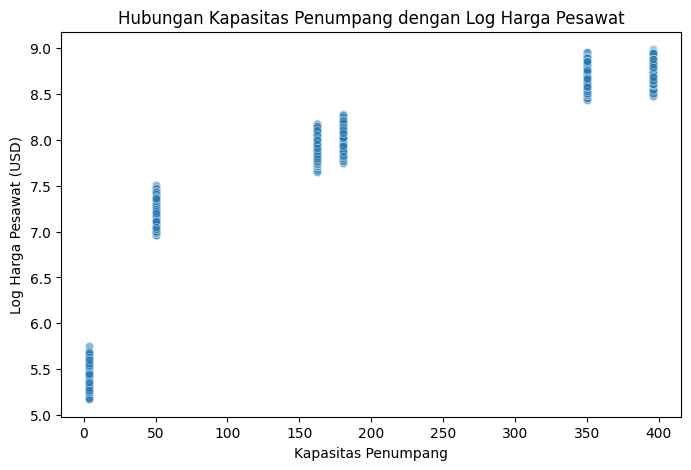

In [84]:
# Buat kolom baru dengan log harga
new_df["Log Price"] = np.log10(new_df["Price in USD"])

# Scatter plot dengan log harga
plt.figure(figsize=(8,5))
sns.scatterplot(x=new_df["Capacity"], y=new_df["Log Price"], alpha=0.5)
plt.title("Hubungan Kapasitas Penumpang dengan Log Harga Pesawat")
plt.xlabel("Kapasitas Penumpang")
plt.ylabel("Log Harga Pesawat (USD)")
plt.show()

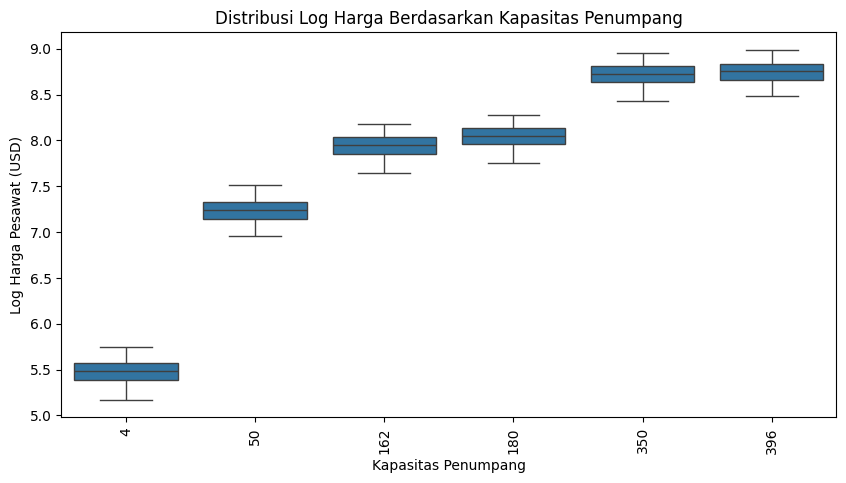

In [85]:
plt.figure(figsize=(10,5))
sns.boxplot(x=new_df["Capacity"], y=new_df["Log Price"])
plt.xticks(rotation=90)  # Memiringkan label jika terlalu panjang
plt.title("Distribusi Log Harga Berdasarkan Kapasitas Penumpang")
plt.xlabel("Kapasitas Penumpang")
plt.ylabel("Log Harga Pesawat (USD)")
plt.show()


In [86]:
correlation = new_df[["Capacity", "Log Price"]].corr()
print(correlation)


           Capacity  Log Price
Capacity       1.00       0.88
Log Price      0.88       1.00


In [89]:
import statsmodels.api as sm

X = new_df["Capacity"]
y = new_df["Log Price"]

# Tambahkan konstanta ke model
X = sm.add_constant(X)

# Buat model regresi linear
model = sm.OLS(y, X).fit()

# Tampilkan ringkasan hasil regresi
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Log Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                 2.748e+04
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:24:28   Log-Likelihood:                -6448.0
No. Observations:                8089   AIC:                         1.290e+04
Df Residuals:                    8087   BIC:                         1.291e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3750      0.010    644.891      0.0

Dari output regresi, kita bisa mengambil beberapa insight penting mengenai hubungan antara kapasitas penumpang dan harga pesawat

✅ R-squared = 0.773 → 77.3% variasi dalam harga pesawat bisa dijelaskan oleh kapasitas penumpang.

- Ini menunjukkan hubungan yang cukup kuat.
- Namun, masih ada 22.7% faktor lain yang mempengaruhi harga pesawat.

✅ P-Value Capacity = 0.000 → Hubungan ini sangat signifikan!
Artinya, kapasitas benar-benar memiliki dampak terhadap harga pesawat.

✅ Koefisien Capacity = 0.0069 → Setiap tambahan 1 kursi meningkatkan harga pesawat sebesar ~0.69% dalam skala log.

- Jika kita ingin mendapatkan kenaikan harga dalam skala normal (bukan log), kita bisa menghitungnya dengan exp(0.0069) ≈ 1.007.

- Artinya, setiap tambahan 1 kursi meningkatkan harga pesawat sekitar 0.7%.

✅ Intercept (const) = 6.375
Ini adalah harga dasar dalam skala log saat kapasitas = 0 (tidak terlalu relevan secara praktis)

 Apakah Model Ini Valid?

✅ Durbin-Watson = 1.972 → Tidak ada autokorelasi signifikan dalam residual.

✅ Jarque-Bera & Skewness → Distribusi residual masih bisa diterima, meskipun sedikit miring ke kiri.

